# Explore XCO2 in OCO-2 dataset

In [87]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 8

import warnings
warnings.filterwarnings('ignore')

## Import packages

In [88]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!
# custom color map downloaded from GEOS-Chem python tutorial
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable
#type(WhGrYlRd)
import re

### Read in OCO-2 file

In [100]:
#fname = '/home/msadiq/Desktop/co2/data/satellite/OCO2_b91_10sec_GOOD_r24.nc4'
fname = './OCO2_b91_10sec_GOOD_r24.nc4'
ds = xr.open_dataset(fname, engine='netcdf4')
#ds # same as print(ds)

<xarray.Dataset>
Dimensions:                       (epoch_dimension: 7, levels: 20, sounding_id: 1319634)
Coordinates:
  * sounding_id                   (sounding_id) int64 20140906020721 ... 20190731225946
Dimensions without coordinates: epoch_dimension, levels
Data variables:
    test_flag                     (sounding_id) int8 ...
    latitude                      (sounding_id) float32 ...
    longitude                     (sounding_id) float32 ...
    data_type                     (sounding_id) int8 ...
    date                          (sounding_id, epoch_dimension) int16 ...
    time                          (sounding_id) datetime64[ns] ...
    solar_zenith_angle            (sounding_id) float32 ...
    solar_azimuth_angle           (sounding_id) float32 ...
    sensor_zenith_angle           (sounding_id) float32 ...
    sensor_azimuth_angle          (sounding_id) float32 ...
    psurf_apriori_b8              (sounding_id) float32 ...
    psurf_apriori_o2a             (sounding_id) float32 ...
    psurf_apriori_wco2            (sounding_id) float32 ...
    psurf_apriori_sco2            (sounding_id) float32 ...
    psurf_apriori                 (sounding_id) float32 ...
    psurf                         (sounding_id) float32 ...
    xco2_raw                      (sounding_id) float32 ...
    xco2_apriori                  (sounding_id) float32 ...
    xco2                          (sounding_id) float32 ...
    xco2_uncertainty              (sounding_id) float32 ...
    model_error                   (sounding_id) float32 ...
    co2_profile_apriori           (sounding_id, levels) float32 ...
    xco2_averaging_kernel         (sounding_id, levels) float32 ...
    pressure_weight               (sounding_id, levels) float32 ...
    sigma_levels                  (levels) float32 ...
    xco2_quality_flag             (sounding_id) int8 ...
    warn_level                    (sounding_id) int8 ...
    land_fraction                 (sounding_id) int8 ...
    altitude                      (sounding_id) float32 ...
    airmass                       (sounding_id) float32 ...
    path                          (sounding_id) int16 ...
    operation_mode                (sounding_id) int8 ...
    land_water_indicator          (sounding_id) int8 ...
    surface_type                  (sounding_id) int8 ...
    fs                            (sounding_id) float32 ...
    delta_windspeed               (sounding_id) float32 ...
    s31                           (sounding_id) float32 ...
    s32                           (sounding_id) float32 ...
    albedo_3                      (sounding_id) float32 ...
    albedo_slope_3                (sounding_id) float32 ...
    aod_total                     (sounding_id) float32 ...
    albedo_2                      (sounding_id) float32 ...
    co2_grad_del                  (sounding_id) float32 ...
    dws                           (sounding_id) float32 ...
    dpfrac                        (sounding_id) float32 ...
    dp_o2a                        (sounding_id) float32 ...
    dp                            (sounding_id) float32 ...
    dp_abp                        (sounding_id) float32 ...
    co2_ratio                     (sounding_id) float32 ...
    h2o_ratio                     (sounding_id) float32 ...
    xco2_weak_idp                 (sounding_id) float32 ...
    xco2_strong_idp               (sounding_id) float32 ...
    tcwv_apriori                  (sounding_id) float32 ...
    tcwv                          (sounding_id) float32 ...
    ice_height                    (sounding_id) float32 ...
    h2o_scale                     (sounding_id) float32 ...
    deltaT                        (sounding_id) float32 ...
    snr_o2a                       (sounding_id) float32 ...
    snr_wco2                      (sounding_id) float32 ...
    snr_sco2                      (sounding_id) float32 ...
    altitude_stddev               (sounding_id) float32 ...
    N_total_shots                 (sounding_id

### Read in data and use Pandas package

In [90]:
# first and last day of extraction
first_day = '2018-03-01'
last_day_p1 = '2018-04-01' # last day plus 1

In [91]:
dr_xco2 = ds['xco2']                     # column co2 concentration, ppm
dr_kernel = ds['xco2_averaging_kernel']  # averaging kernel to get xco2 from [co2]
lon_series = ds['longitude']
lat_series = ds['latitude']
sound_id = ds['sounding_id']             # time

# convert time input to match the format of sound_id
first_day_digital = re.sub("[^0-9]", "", first_day)
last_day_p1_digital = re.sub("[^0-9]", "", last_day_p1)
begin = int(first_day_digital + '000000')  # begin and end of time slice we want to look at
end = int(last_day_p1_digital + '000000')  # OCO-2 format

In [92]:
# following 4 lines could prob be simplified, combine them first, and then slice???
# get a slice of time window
slice_xco2 = dr_xco2.sel(sounding_id=slice(begin, end))
slice_lon = lon_series.sel(sounding_id=slice(begin, end))
slice_lat = lat_series.sel(sounding_id=slice(begin, end))
sound_id = sound_id.sel(sounding_id=slice(begin, end))
df_xco2 = pd.DataFrame({'sound_id': sound_id, 'lon': slice_lon, 'lat': slice_lat, 'xco2': slice_xco2})
#df_xco2.head()
df_xco2.head()

,sound_id,lon,lat,xco2
0,20180301005336,-166.029999,-33.000000,404.010010
1,20180301005346,-166.080002,-32.779999,404.410004
2,20180301005416,-166.570007,-30.740000,404.170013
3,20180301005436,-166.789993,-29.809999,403.880005
4,20180301005446,-166.919998,-29.320000,404.190002


In [93]:
# Creat target grid
lat_res = 2 # horizontal resolution of lat and lon you would want
lon_res = 2.5
lat = np.linspace(-90, 90, 91) # grid
lon = np.linspace(-180, 177.5, 144)

day_1 = np.array(first_day,dtype='datetime64[D]')
day_end = np.array(last_day_p1,dtype='datetime64[D]')
days = np.arange(day_1, day_end, dtype='datetime64[D]') # time dimension of output

xco2 = xr.DataArray(data = 0, 
                      dims = ('lat', 'lon', 'time'), 
                      coords = {'lat': lat,
                              'lon': lon,
                              'time': days},
                      name = 'XCO2')

xco2 = xco2.astype(dtype='float32')
#xco2

In [94]:
print(type(last_day_p1_digital))
days_range = np.arange(first_day, last_day_p1, dtype='datetime64[D]')
days_range

<class 'str'>


array(['2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
       '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
       '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
       '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
       '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20',
       '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
       '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28',
       '2018-03-29', '2018-03-30', '2018-03-31'], dtype='datetime64[D]')

In [95]:
# map XCO2 to target grid
for iday in np.arange(len(days_range)-1):
    for ilon in np.arange(len(lon)-1):
        for ilat in np.arange(len(lat)-1):
            day1=re.sub("[^0-9]", "", str(days_range[iday]))
            day2=re.sub("[^0-9]", "", str(days_range[iday+1]))
            begin = int(str(day1) + '000000')  # begin and end of time slice we want to look at
            end = int(str(day2) + '000000')  # OCO-2 format
            df_time_slice = df_xco2[df_xco2['sound_id'].between(begin, end)]
            df_slice_lat = df_time_slice[df_xco2['lat'].between(lat[ilat],lat[ilat+1], inclusive = True)]
            df_slice_lon = df_slice_lat[df_slice_lat['lon'].between(lon[ilon],lon[ilon+1], inclusive = True)]
            if len(df_slice_lon.xco2) != 0:
                xco2[ilat,ilon,iday] = df_slice_lon.xco2.mean() # include deviation as well?

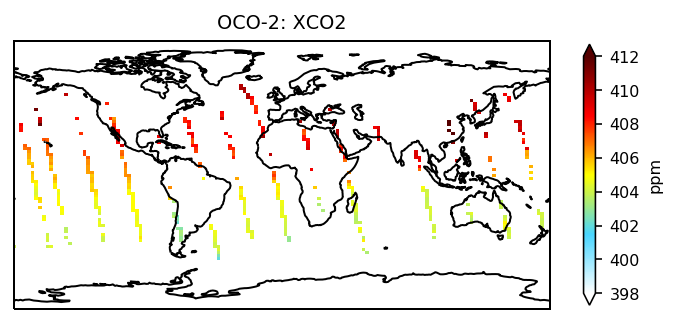

In [98]:
# plot after mapping
fig = plt.figure(figsize=[6, 6])
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)
ax.coastlines()
xco2.isel(time=iday).plot(ax=ax, transform=ccrs.PlateCarree(), vmax=412, vmin=398, cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.4, 'label': 'ppm'})

ax.set_title('OCO-2: XCO2');

In [99]:
xco2.to_netcdf('XCO2_3d_' + first_day + '_' + last_day_p1 +'.nc')